In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

apartments = [f"Apt_{i}" for i in range(1, 21)]

dates = pd.date_range(start="2025-07-01", periods=30, freq="D")

total_records = len(apartments) * len(dates)

data = {
    "Date": np.tile(dates, len(apartments)),
    "Apartment": np.repeat(apartments, len(dates)),
    "Electricity_usage": np.random.normal(loc=20, scale=5, size=total_records)
}

df = pd.DataFrame(data)

df


,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.483571
1,2025-07-02,Apt_1,19.308678
2,2025-07-03,Apt_1,23.238443
3,2025-07-04,Apt_1,27.615149
4,2025-07-05,Apt_1,18.829233
...,...,...,...
595,2025-07-26,Apt_20,17.449918
596,2025-07-27,Apt_20,18.650625
597,2025-07-28,Apt_20,15.106181
598,2025-07-29,Apt_20,17.778534


In [2]:
df.dtypes

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object

In [3]:
df.describe()

,Date,Electricity_usage
count,600,600.000000
mean,2025-07-15 12:00:00,19.932404
min,2025-07-01 00:00:00,3.793663
25%,2025-07-08 00:00:00,16.526932
50%,2025-07-15 12:00:00,20.038692
75%,2025-07-23 00:00:00,23.115837
max,2025-07-30 00:00:00,39.263657
std,NaN,4.860957


In [4]:
#Total usage per apartments
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)

print(usage_per_apartment)




Apartment
Apt_11    642.282391
Apt_6     641.817993
Apt_13    634.225898
Apt_10    616.074819
Apt_20    613.164300
Apt_7     609.838848
Apt_8     607.205434
Apt_16    606.985293
Apt_14    604.314773
Apt_3     601.932716
Apt_4     596.962256
Apt_15    591.394231
Apt_19    586.585246
Apt_5     585.756283
Apt_2     581.825629
Apt_9     578.485218
Apt_1     571.777966
Apt_17    570.315585
Apt_12    569.016727
Apt_18    549.480581
Name: Electricity_usage, dtype: float64


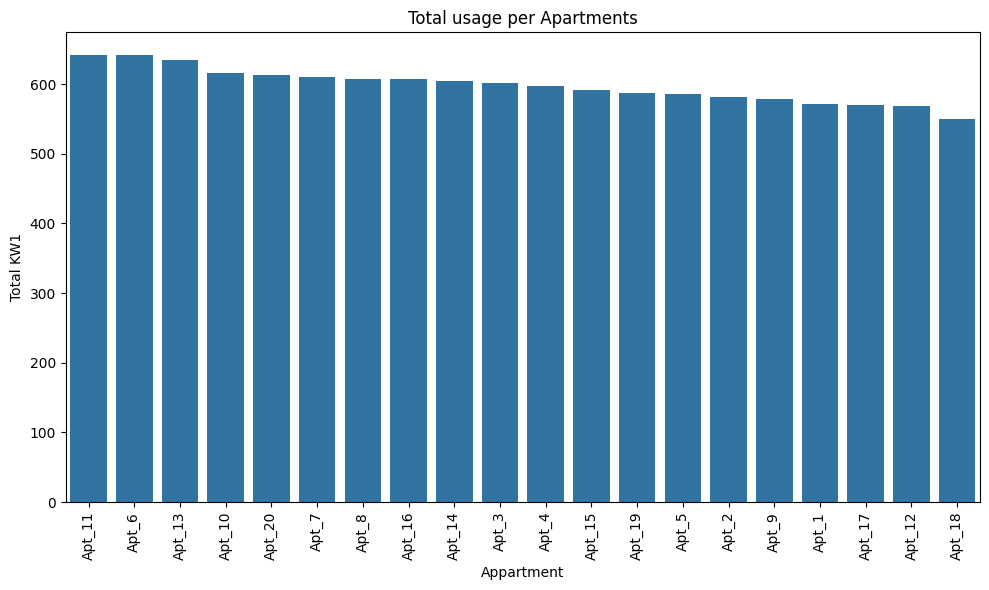

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

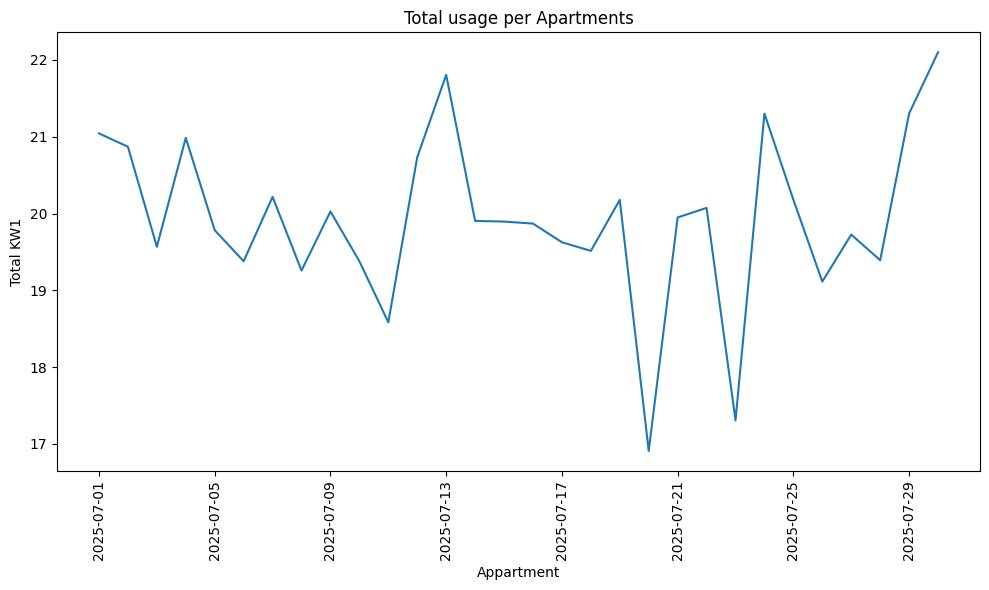

In [7]:
daily_avg = df.groupby('Apartment')['Electricity_usage'].mean()
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date column is in datetime format
daily_avg = df.groupby('Date')['Electricity_usage'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x = daily_avg.index, y = daily_avg.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()

In [8]:
thresholds=df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"] > thresholds
print(df[df["High_usage_flag"] == True].head())


          Date Apartment  Electricity_usage  High_usage_flag
113 2025-07-24     Apt_4          32.316211             True
125 2025-07-06     Apt_5          30.952278             True
179 2025-07-30     Apt_6          33.600846             True
209 2025-07-30     Apt_7          39.263657             True
220 2025-07-11     Apt_8          31.573293             True
